In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import pysindy as ps
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
import random
from scipy.optimize import minimize
import cvxpy as cp

### Lorenz System

In [47]:
noise_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

success_original = [99.2, 96.0, 86.8, 78.8, 64.0, 37.6, 23.2, 12.8, 6.0, 4.0, 1.6, 1.2, 1.2, 0.4, 0.0]
success_savgol = [99.2, 91.2, 86.8, 72.4, 57.6, 38.0, 25.6, 16.8, 7.6, 3.2, 2.0, 1.2, 1.2, 0.4, 0.0]
success_l1 = [99.2, 94.0, 84.0, 72.8, 58.4, 36.0, 24.4, 15.2, 7.2, 3.6, 3.2, 1.6, 1.2, 0.4, 0.0]
success_savl1 = [99.2, 91.2, 86.8, 72.4, 57.2, 37.6, 25.6, 17.2, 7.6, 3.2, 1.2, 1.2, 1.2, 0.0, 0.0]
success_l1sav = [99.2, 90.8, 82.8, 71.2, 57.6, 38.4, 24.4, 12.4, 6.8, 4.0, 2.0, 1.2, 1.6, 0.0, 0.0]

coeff_error_original = [
    0.18818527119340783, 0.489951063122386, 0.9570766045230327, 1.1302321428204152, 
    1.6756417490958693, 2.1268196870752516, 3.599476735079668, 5.312741089311323, 
    6.24107669384922, 8.68974278417903, 12.251609692630838, 15.01138285066497, 
    16.942575746023728, 19.1285772859767, 21.814410133381397
]

coeff_error_savgol = [
    0.1881831308806856, 0.6361108675490277, 0.8654463031817404, 1.2456714270996658, 
    1.6785859777823309, 1.9660802426677007, 3.015800201663141, 4.6708845735872275, 
    5.412880647159054, 7.838167664196136, 10.464454997040088, 13.320142838715299, 
    14.866989743278024, 18.0631574895907, 19.830624846441832
]

coeff_error_l1 = [
    0.18827986191947896, 0.6104737623079981, 1.1595301870573262, 1.4897201537976825, 
    1.9747745580501854, 2.557871687933225, 2.96046885653796, 5.249938618448885, 
    5.922984405091207, 8.367317189145535, 11.02687513892207, 13.235412871917703, 
    15.231273306276627, 17.18050757139416, 19.776770038332355
]

coeff_error_savl1 = [
    0.1882777199212195, 0.6363008145792737, 0.8660451466561025, 1.2465697095081891, 
    1.6919762099963978, 1.9769614707745726, 3.0182226224437234, 4.679830502262202, 
    5.416790592367847, 7.861030149278047, 10.565032631901841, 13.301670555759781, 
    14.91036563784323, 18.02282764330154, 19.79551502237124
]

coeff_error_l1sav = [
    0.18822481482515274, 0.6881113675247138, 1.1326990794619056, 1.414676854890687, 
    1.849242105039444, 2.3100283399115042, 3.1273971956499665, 5.1488560716667125, 
    5.978565840864121, 8.574397692781671, 11.059104768093173, 13.325868275590237, 
    15.001565845379325, 17.486230164947806, 19.587087428981636
]

wrong_terms_original = [
    0.0, 0.0, 0.084, 0.284, 0.548, 1.248, 1.98, 2.64, 3.228, 3.852, 
    4.816, 5.432, 5.412, 5.876, 5.824
]

wrong_terms_savgol = [
    0.0, 0.0, 0.1, 0.32, 0.576, 1.16, 1.852, 2.336, 3.156, 4.212, 
    4.6, 5.64, 6.4, 7.068, 7.328
]

wrong_terms_l1 = [
    0.0, 0.0, 0.084, 0.308, 0.58, 1.12, 1.664, 2.284, 2.948, 4.12, 
    4.488, 5.34, 6.008, 6.484, 6.976
]

wrong_terms_savl1 = [
    0.0, 0.0, 0.1, 0.32, 0.576, 1.16, 1.852, 2.34, 3.168, 4.256, 
    4.616, 5.644, 6.432, 7.052, 7.312
]

wrong_terms_l1sav = [
    0.0, 0.0, 0.088, 0.332, 0.592, 1.168, 1.792, 2.4, 3.136, 4.264, 
    4.58, 5.54, 6.324, 6.848, 7.18
]

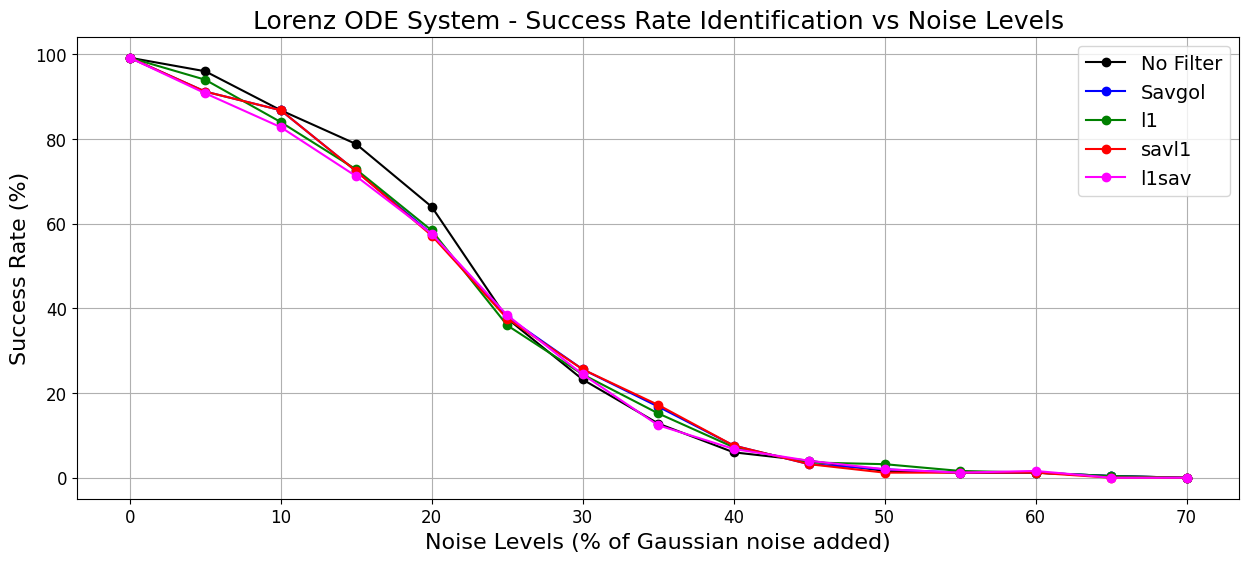

In [48]:
# Plotting
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, success_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, success_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, success_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, success_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, success_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Lorenz ODE System - Success Rate Identification vs Noise Levels',fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)',fontsize=16)
plt.ylabel('Success Rate (%)',fontsize=16)
plt.legend(loc='upper right',fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

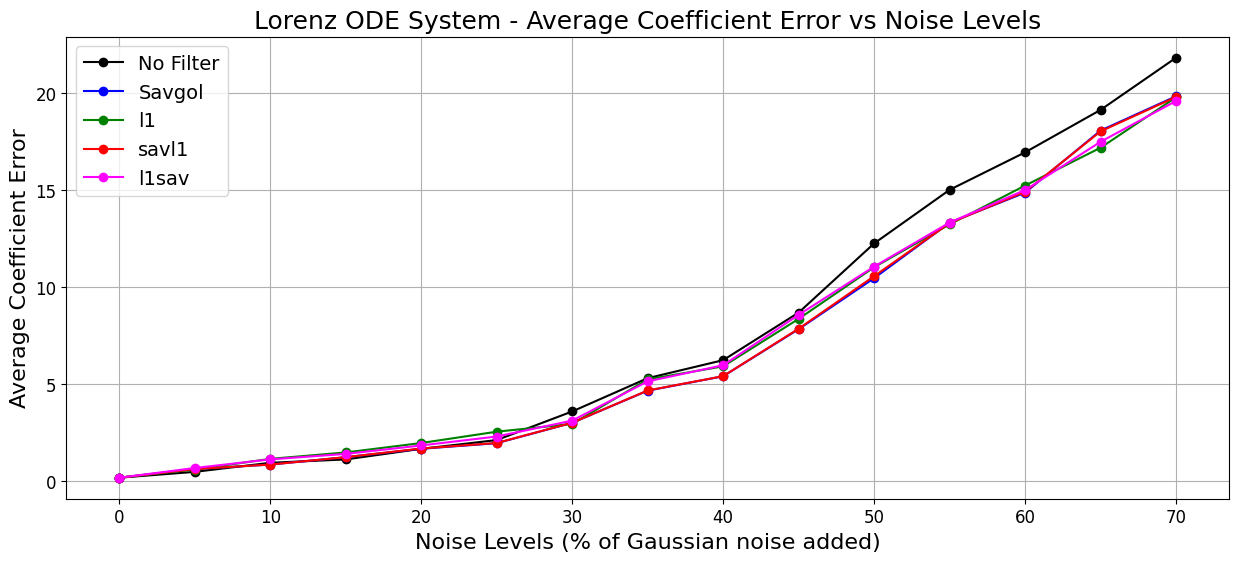

In [49]:
# Plotting
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, coeff_error_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, coeff_error_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, coeff_error_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, coeff_error_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, coeff_error_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Lorenz ODE System - Average Coefficient Error vs Noise Levels',fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)',fontsize=16)
plt.ylabel('Average Coefficient Error',fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

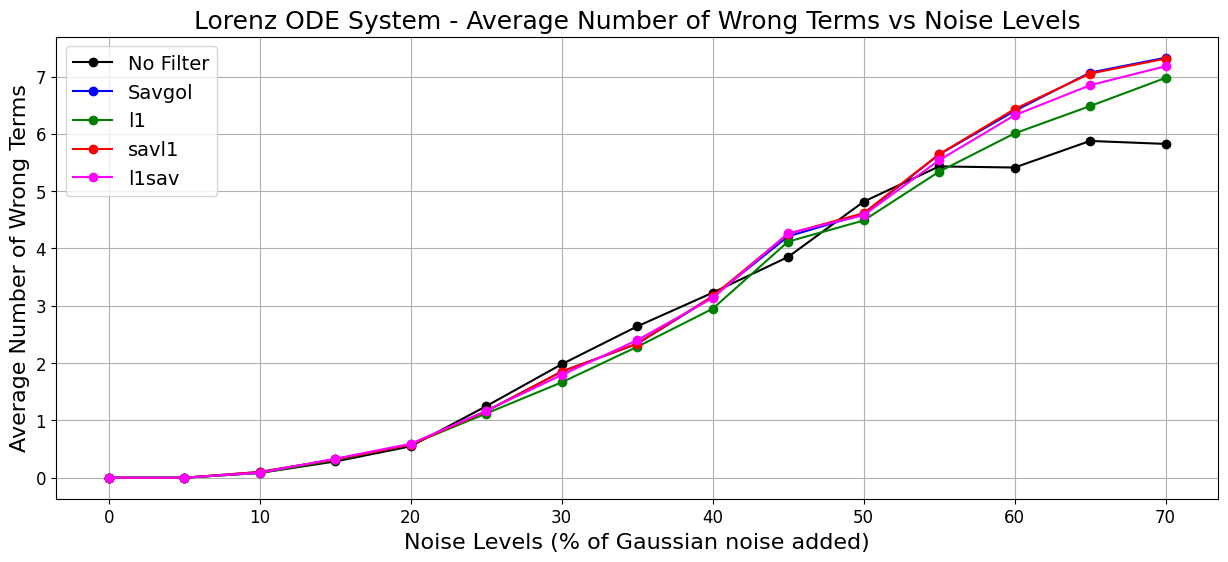

In [50]:
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, wrong_terms_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, wrong_terms_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, wrong_terms_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, wrong_terms_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, wrong_terms_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Lorenz ODE System - Average Number of Wrong Terms vs Noise Levels',fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)',fontsize=16)
plt.ylabel('Average Number of Wrong Terms',fontsize=16)
plt.legend(loc='upper left',fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

### Viscous Burgers

In [53]:
noise_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

In [58]:
success_original = [100.0, 100.0, 100.0, 99.4, 90.2, 67.8, 39.0, 21.8, 7.8, 4.0, 2.2, 1.8, 1.0, 0.8, 1.4, 0.4, 0.8, 0.4, 0.4, 0.6, 0.0]
success_savgol = [100.0, 100.0, 99.8, 94.2, 86.4, 74.4, 59.2, 56.0, 42.2, 40.0, 33.2, 26.4, 25.8, 19.8, 18.8, 14.2, 12.2, 8.4, 8.2, 7.0, 4.0]
success_l1 = [100.0, 100.0, 99.8, 98.4, 95.4, 93.4, 82.6, 77.4, 67.8, 60.0, 57.4, 50.2, 43.4, 38.8, 31.6, 26.6, 24.6, 19.8, 15.8, 15.0, 12.6]
success_savl1 = [100.0, 100.0, 99.6, 98.0, 93.8, 86.6, 71.4, 60.6, 49.2, 42.4, 35.6, 29.0, 25.6, 18.6, 17.0, 14.0, 11.2, 8.0, 7.6, 7.0, 4.0]
success_l1sav = [100.0, 100.0, 99.8, 97.4, 94.2, 91.8, 78.2, 74.6, 66.4, 61.8, 58.2, 49.0, 45.2, 40.2, 33.4, 30.0, 28.4, 22.2, 18.0, 19.0, 16.6]

coeff_error_original = [
    0.0025985954130340245,
    0.004748703003961707,
    0.009148495436788731,
    0.017436223207068596,
    0.06691692294302595,
    0.17595868091709957,
    0.3102604252888219,
    0.4127654398537682,
    0.4821466818838411,
    0.46512760435071526,
    0.4775124681833634,
    0.5122556433157907,
    0.4885304240865216,
    0.4824142397132247,
    0.4780077016476016,
    0.43611291198031166,
    0.45941489872672764,
    0.44344976845080936,
    0.4260811746619979,
    0.428833534508367,
    0.4699497094454906 
]

coeff_error_savgol = [
    0.0026946802983900354,
    0.005573844677187036,
    0.010187397712479828,
    0.021248361994467956,
    0.033562397432456835,
    0.06489733294303934,
    0.10486760553311922,
    0.13320966657517852,
    0.20465925426030843,
    0.2504473454228424,
    0.3094949295195132,
    0.3383625326889362,
    0.3826124067564417,
    0.4492721632947345,
    0.49148524932615656,
    0.5227483881694164,
    0.5420849550030502,
    0.6425577946915464,
    0.6037631431474386,
    0.6824936302463472,
    0.7058423941649434 
]

coeff_error_l1 = [
    0.002598780231545801,
    0.005459254425984216,
    0.010575103781349965,
    0.015940655012479748,
    0.023746582678438877,
    0.036506415271907545,
    0.0658203147036907,
    0.09579284757405054,
    0.1431220578026489,
    0.19341323778397476,
    0.21883783649669994,
    0.24666215536649091,
    0.3074129565904584,
    0.3514922424648158,
    0.3884233693311683,
    0.4371455387607859,
    0.42717937152812546,
    0.5040860384046969,
    0.5072802592258743,
    0.5955837814064783,
    0.5705827129038642 
]

coeff_error_savl1 = [
    0.002694790505783578,
    0.007494126796935778,
    0.015135198454690203,
    0.02276504805079266,
    0.03387382204674077,
    0.05699515573756245,
    0.10036911767342413,
    0.14758496935614243,
    0.2030106849110197,
    0.2553879353756239,
    0.310867333864025,
    0.3234459155439421,
    0.38337662868299277,
    0.434632435809899,
    0.47075603374165226,
    0.5090710026358192,
    0.5237794569637074,
    0.6242764566306445,
    0.5942424330960167,
    0.667293016583771,
    0.6846927190074211 
]

coeff_error_l1sav = [
    0.0026948224481554805,
    0.006205468309648025,
    0.01191911382011209,
    0.01820260320969215,
    0.024910633147459706,
    0.033403370545400164,
    0.0596517435660968,
    0.0914814006576695,
    0.1245720778218963,
    0.1663606931190808,
    0.18107940723995813,
    0.21291931679040205,
    0.276151253093447,
    0.3165843636076325,
    0.3598941112438497,
    0.3996348988979257,
    0.40887375525315194,
    0.48234270422380445,
    0.47603568272397334,
    0.5509180986305791,
    0.5445253202508532 
]

wrong_terms_original = [0.0, 0.0, 0.0, 0.004, 0.108, 0.43, 1.018, 1.572, 2.006, 2.138, 2.314, 2.41, 2.57, 2.534, 2.52, 2.5, 2.758, 2.762, 2.73, 2.85, 3.12]
wrong_terms_savgol = [0.0, 0.0, 0.004, 0.07, 0.196, 0.472, 0.816, 0.892, 1.282, 1.406, 1.668, 1.924, 1.996, 2.14, 2.238, 2.432, 2.478, 2.606, 2.592, 2.684, 2.804]
wrong_terms_l1 = [0.0, 0.0, 0.004, 0.026, 0.086, 0.14, 0.364, 0.454, 0.688, 0.918, 0.942, 1.206, 1.506, 1.602, 1.826, 2.068, 2.048, 2.282, 2.482, 2.574, 2.482]
wrong_terms_savl1 = [0.0, 0.0, 0.008, 0.032, 0.096, 0.254, 0.566, 0.804, 1.118, 1.368, 1.588, 1.856, 2.024, 2.182, 2.292, 2.522, 2.592, 2.714, 2.76, 2.78, 2.898]
wrong_terms_l1sav = [0.0, 0.0, 0.004, 0.038, 0.108, 0.162, 0.412, 0.506, 0.678, 0.832, 0.904, 1.204, 1.306, 1.486, 1.686, 1.804, 1.924, 2.148, 2.298, 2.426, 2.374]

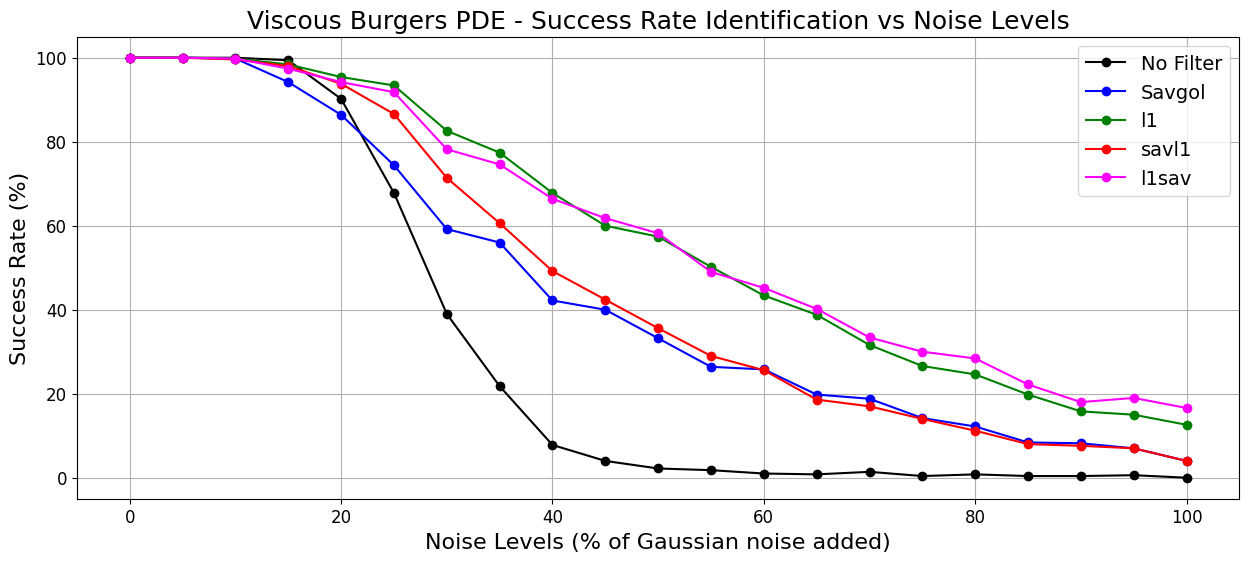

In [59]:
# Plotting
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, success_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, success_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, success_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, success_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, success_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Viscous Burgers PDE - Success Rate Identification vs Noise Levels', fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)', fontsize=16)
plt.ylabel('Success Rate (%)', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

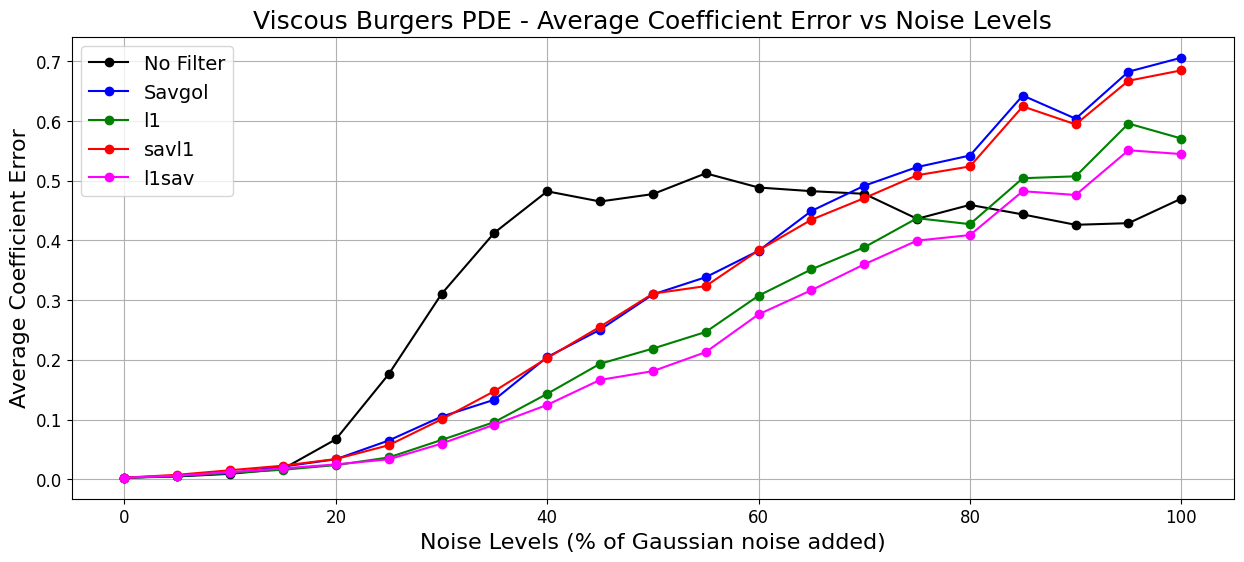

In [60]:
# Plotting
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, coeff_error_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, coeff_error_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, coeff_error_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, coeff_error_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, coeff_error_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Viscous Burgers PDE - Average Coefficient Error vs Noise Levels', fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)', fontsize=16)
plt.ylabel('Average Coefficient Error', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

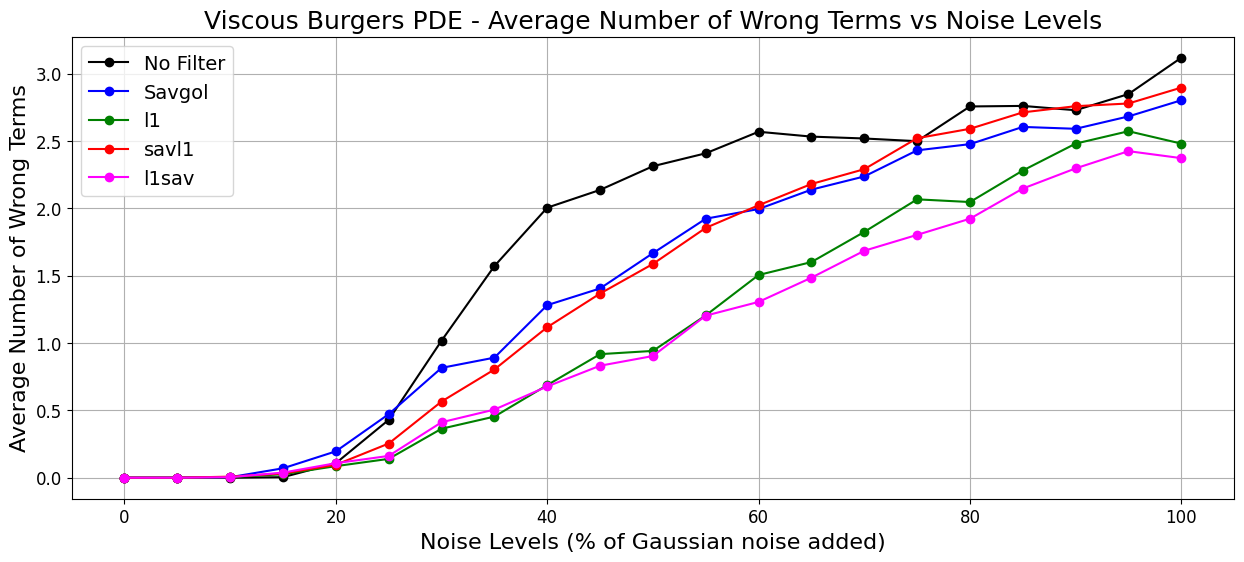

In [61]:
plt.figure(figsize=(15,6))

# Plotting data for each method
plt.plot(noise_levels, wrong_terms_original, marker='o', label='No Filter', color='Black')
plt.plot(noise_levels, wrong_terms_savgol, marker='o', label='Savgol', color='Blue')
plt.plot(noise_levels, wrong_terms_l1, marker='o', label='l1', color='Green')
plt.plot(noise_levels, wrong_terms_savl1, marker='o', label='savl1', color='Red')
plt.plot(noise_levels, wrong_terms_l1sav, marker='o', label='l1sav', color='Magenta')

# Setting the title and labels
plt.title('Viscous Burgers PDE - Average Number of Wrong Terms vs Noise Levels', fontsize=18)
plt.xlabel('Noise Levels (% of Gaussian noise added)', fontsize=16)
plt.ylabel('Average Number of Wrong Terms', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()